In [23]:
import sys

import pandas as pd

sys.path.append("../../src")
from main.transporter_dataset import create_dataset
from main.eval import full_test
from main.compositions import calculate_aac, calculate_paac
from main.pssm import calculate_pssms_notebook
import matplotlib.pyplot as plt
from main.plots import labeled_clustermap
import seaborn as sns

LOG_FILE = "../../logs/athaliana_electron.log"


In [24]:
df_all = create_dataset(
    keywords_substrate_filter=[
        "Electron transport",
    ],
    keywords_component_filter=["Transmembrane"],
    keywords_transport_filter=["Transport"],
    input_file="../../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate="keep",
    # outliers=gdu + sodium,
    verbose=True,
    tax_ids_filter=[3702],
    output_log=LOG_FILE,
    # sequence_clustering=70,
)
df_all.columns

Index(['keywords_transport', 'keywords_location', 'keywords_transport_related',
       'gene_names', 'protein_names', 'tcdb_id', 'tcdb_class', 'organism_id',
       'sequence'],
      dtype='object')

In [25]:
df_paac = calculate_aac(sequences=df_all.sequence)

Membrane;Transmembrane                                               30
Membrane;Mitochondrion;Mitochondrion inner membrane;Transmembrane    26
Endoplasmic reticulum;Membrane;Transmembrane                          5
Membrane;Mitochondrion;Transmembrane                                  5
Cell membrane;Membrane;Transmembrane                                  3
Cell membrane;Endoplasmic reticulum;Membrane;Transmembrane            1
Name: keywords_location, dtype: int64

{'Cell membrane;Endoplasmic reticulum;Membrane;Transmembrane': 'cyan',
 'Cell membrane;Membrane;Transmembrane': 'magenta',
 'Endoplasmic reticulum;Membrane;Transmembrane': 'yellow',
 'Membrane;Mitochondrion;Mitochondrion inner membrane;Transmembrane': 'green',
 'Membrane;Mitochondrion;Transmembrane': 'orange'}

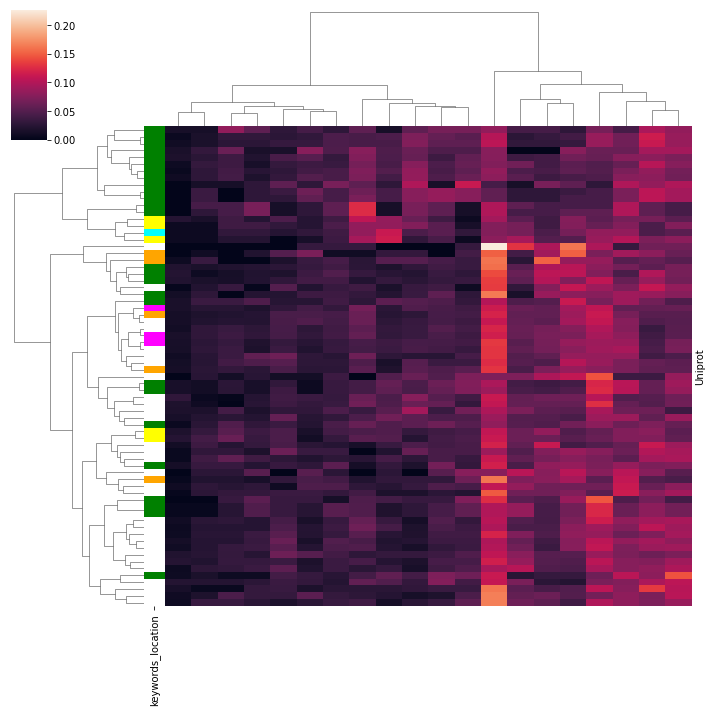

In [26]:
display(df_all.keywords_location.value_counts())
labeled_clustermap(df_paac, df_all.keywords_location)

Electron transport                  62
Electron transport;Ion transport     8
Name: keywords_transport, dtype: int64

{'Electron transport': 'cyan', 'Electron transport;Ion transport': 'magenta'}

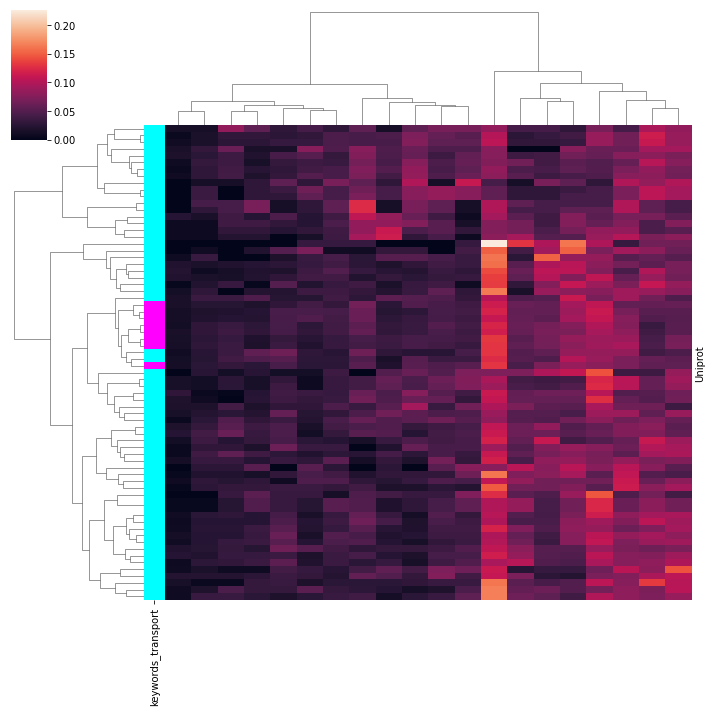

In [27]:
display(df_all.keywords_transport.value_counts())
labeled_clustermap(df_paac, df_all.keywords_transport)

{'Respiratory chain;Transport': 'cyan', 'Transport': 'magenta'}

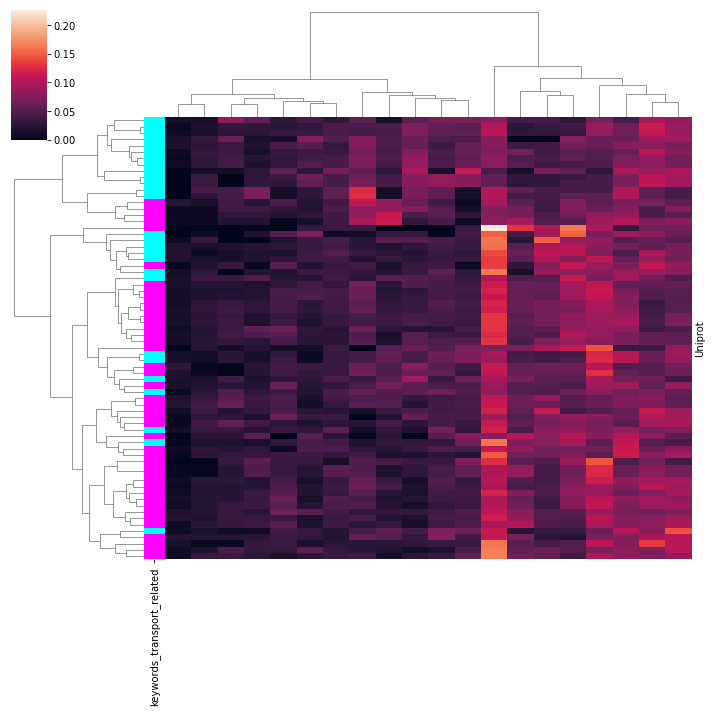

In [28]:
df_all.keywords_transport_related.value_counts()
labeled_clustermap(df_paac, df_all.keywords_transport_related)

In [31]:
print(df_all[df_all.keywords_transport.str.contains("Ion")].index.tolist())
df_all[df_all.keywords_transport.str.contains("Ion")]

['F4I4K7', 'Q8W110', 'Q8RWS6', 'Q8VY13', 'P92949', 'Q3KTM0', 'Q9FLW2', 'Q9LMM2']


,keywords_transport,keywords_location,keywords_transport_related,gene_names,protein_names,tcdb_id,tcdb_class,organism_id,sequence
Uniprot,,,,,,,,,
F4I4K7,Electron transport;Ion transport,Membrane;Mitochondrion;Transmembrane,Transport,FRO3 FROHC At1g23020 F19G10.4,"Ferric reduction oxidase 3, mitochondrial (AtF...",NaN,0.0,3702,MAARGRLVVARGNRSFSSIIRKYSLKRETNKKVIKNVIKLLTMVIL...
Q8W110,Electron transport;Ion transport,Membrane;Transmembrane,Transport,FRO4 At5g23980 MZF18.140,Ferric reduction oxidase 4 (AtFRO4) (EC 1.16.1...,NaN,0.0,3702,MGNMRSLVKTLMVVLFLGWILVWIMISTNLFKSKWTPKLSKYLNTT...
Q8RWS6,Electron transport;Ion transport,Cell membrane;Membrane;Transmembrane,Transport,FRO6 At5g49730 K2I5.9,Ferric reduction oxidase 6 (AtFRO6) (EC 1.16.1...,NaN,0.0,3702,MDDYETPLLSKDSSSSSSVITSSLKWILKVVMSMIFVTWVVFLMMM...
Q8VY13,Electron transport;Ion transport,Membrane;Mitochondrion;Transmembrane,Transport,FRO8 At5g50160 K6A12.2,"Ferric reduction oxidase 8, mitochondrial (AtF...",5.B.1.4.1,5.B,3702,MAKVLTLLVLRLLMNLLLIGWISLWIIKPTTIWIQSWRQAEDTARH...
P92949,Electron transport;Ion transport,Cell membrane;Membrane;Transmembrane,Transport,FRO2 FRD1 At1g01580 F22L4.12,Ferric reduction oxidase 2 (AtFRO2) (EC 1.16.1...,5.B.1.4.4,5.B,3702,MEIEKSNNGGSNPSAGEEFKDMIKGVTKFLMMVIFLGTIMLWIMMP...
Q3KTM0,Electron transport;Ion transport,Membrane;Transmembrane,Transport,FRO7 At5g49740 K2I5.10,"Ferric reduction oxidase 7, chloroplastic (AtF...",NaN,0.0,3702,MDDHETPLLSKDLSSSSSSSSSSSSVVVSSLKWILKVVMSVIFVTW...
Q9FLW2,Electron transport;Ion transport,Cell membrane;Membrane;Transmembrane,Transport,FRO5 At5g23990 MZF18.13,Ferric reduction oxidase 5 (AtFRO5) (EC 1.16.1...,NaN,0.0,3702,MGNMRSLVKMLMVVLFLGWIFVWIMISTNRFQNIWTPKLAKYLKTT...
Q9LMM2,Electron transport;Ion transport,Membrane;Transmembrane,Transport,FRO1 At1g01590 F22L4.13,Probable ferric reduction oxidase 1 (AtFRO1) (...,NaN,0.0,3702,MGVGEMNKEVIDKVIKFLMMVILMGTIVIWIMMPTSTYKEIWLTSM...


In [30]:
df_all[~df_all.keywords_transport.str.contains("Ion")]

,keywords_transport,keywords_location,keywords_transport_related,gene_names,protein_names,tcdb_id,tcdb_class,organism_id,sequence
Uniprot,,,,,,,,,
P0DKI1,Electron transport,Membrane;Mitochondrion;Mitochondrion inner mem...,Transport,SDH3-2 At4g32210 F10M6.150,"Succinate dehydrogenase subunit 3-2, mitochond...",NaN,0.0,3702,MAATALFRSIRRRDVVSAPLSVYKSLAGNAQPSWGSSYIGQNYASF...
Q8RWA7,Electron transport,Membrane;Mitochondrion;Mitochondrion inner mem...,Respiratory chain;Transport,MEE4 At1g04630 T1G11.12,NADH dehydrogenase [ubiquinone] 1 alpha subcom...,3.D.1.6.3,3.D,3702,MTEAMIRNKPGMASVKDMPLLQDGPPPGGFAPVRYARRISNTGPSA...
P93313,Electron transport,Membrane;Mitochondrion;Mitochondrion inner mem...,Respiratory chain;Transport,ND4 NAD4 AtMg00580,NADH-ubiquinone oxidoreductase chain 4 (EC 7.1...,NaN,0.0,3702,MLEHFCECYFNLSGLILCPVLGSIILLFIPNSRIRLIRLIGLCASL...
Q9FGK0,Electron transport,Membrane;Mitochondrion;Mitochondrion inner mem...,Respiratory chain;Transport,At5g47570 MNJ7.16,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,NaN,0.0,3702,MAGRLSGVASRIMGGNGVVARSVGSSLRQRAGMGLPVGKHIVPDKP...
Q9LXJ2,Electron transport,Membrane;Mitochondrion;Mitochondrion inner mem...,Respiratory chain;Transport,QCR9 At3g52730 F3C22.130,"Cytochrome b-c1 complex subunit 9, mitochondri...",NaN,0.0,3702,MEYAARRNQKGAFEGFYKLIMRRNSVYVTFIIAGAFFGERAVDYGV...
...,...,...,...,...,...,...,...,...,...
Q9LYR2,Electron transport,Membrane;Mitochondrion;Mitochondrion inner mem...,Respiratory chain;Transport,UCR1-2 At5g13440 T22N19.90,"Cytochrome b-c1 complex subunit Rieske-2, mito...",NaN,0.0,3702,MLRVAGRRLFSVSQRSSTATSFVLSRDHTLSDGGNSSSASRSVPSA...
Q9ZR03,Electron transport,Membrane;Transmembrane,Transport,petC PGR1 At4g03280 F4C21.21,"Cytochrome b6-f complex iron-sulfur subunit, c...",3.D.3.5.2,3.D,3702,MASSSLSPATQLGSSRSALMAMSSGLFVKPTKMNHQMVRKEKIGLR...
Q9M9R9,Electron transport,Membrane;Mitochondrion;Mitochondrion inner mem...,Respiratory chain;Transport,At1g14450 F14L17.22,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,NaN,0.0,3702,MAKPLGTTGEFFRRRDEWRKHPMLSNQMRHALPGLGIGVAAFCVYL...
